# **Watershed Algorithm**
**Count the number of coins in the image**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [6]:
sep_coin = cv2.imread("../Image_processing/Resources/DATA/pennies.jpg")

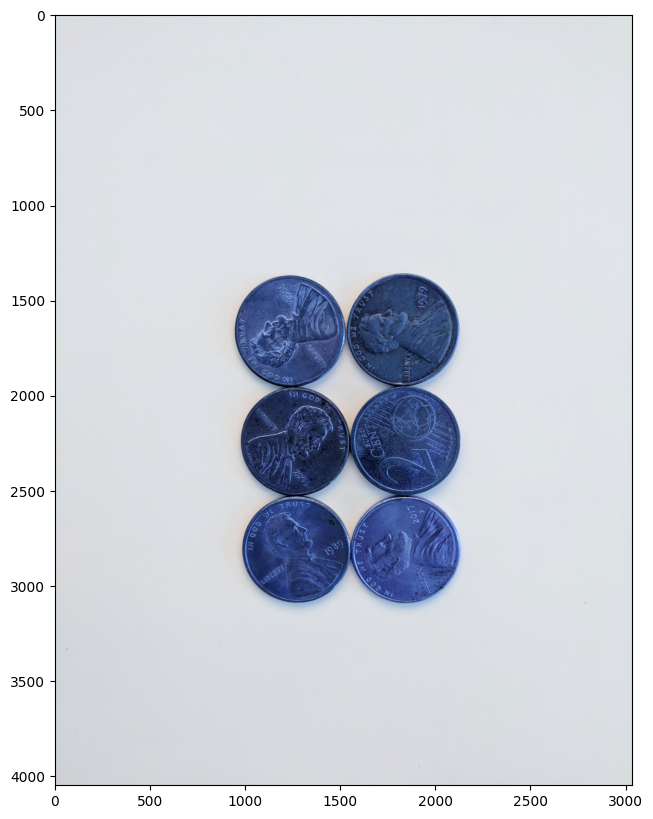

In [7]:
display(sep_coin)

In [8]:
# Median Blur
# Grayscale
# Binary Threshold(Black&White)
# Find contours

## **Traditional Approch**

In [9]:
sep_blur = cv2.medianBlur(sep_coin, 25)

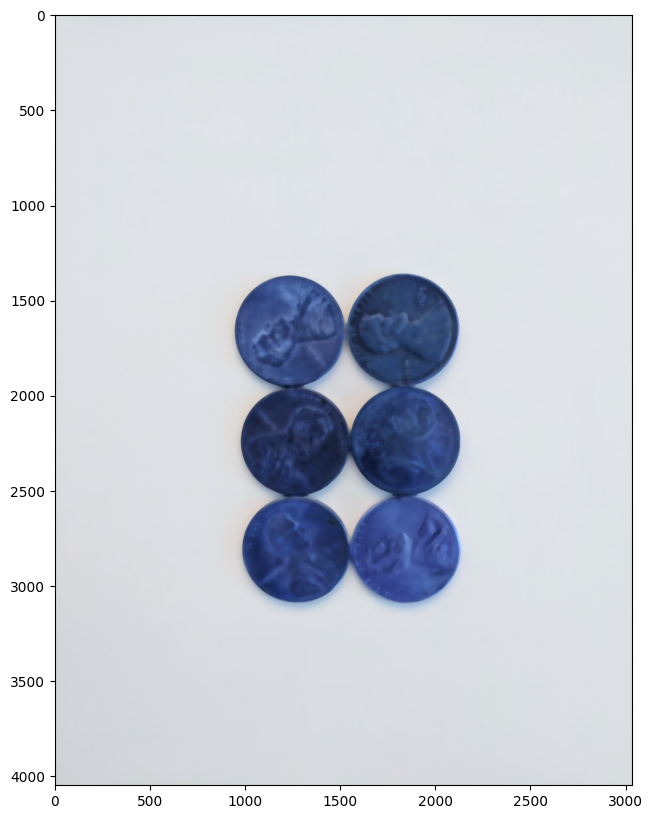

In [10]:
display(sep_blur)

In [11]:
gray_sep_coin = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

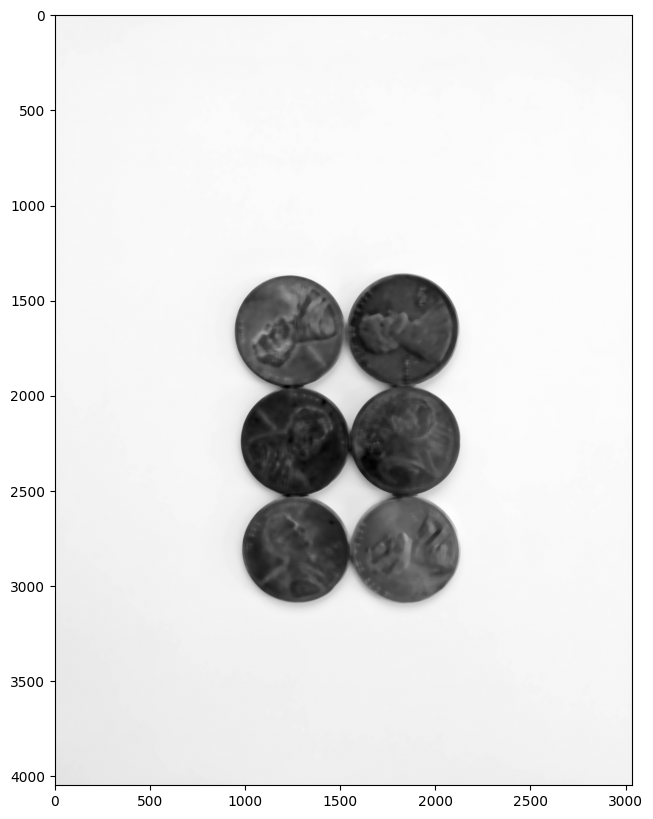

In [12]:
display(gray_sep_coin)

In [20]:
ret, sep_threshold = cv2.threshold(gray_sep_coin, 157, 255, cv2.THRESH_BINARY_INV)

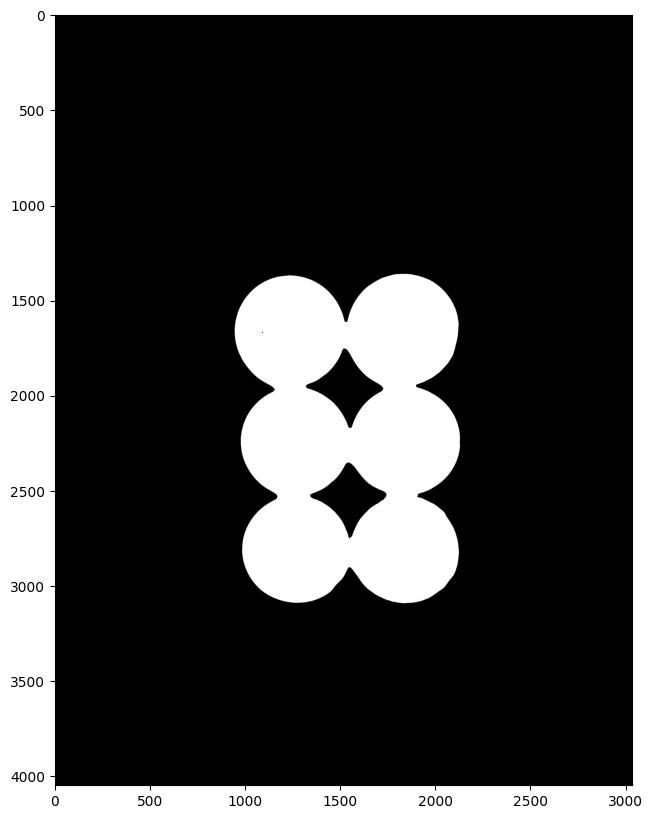

In [21]:
display(sep_threshold)

In [22]:
contours, hierarchy = cv2.findContours(sep_threshold.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [24]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coin, contours, i, (255, 0, 0), 10)

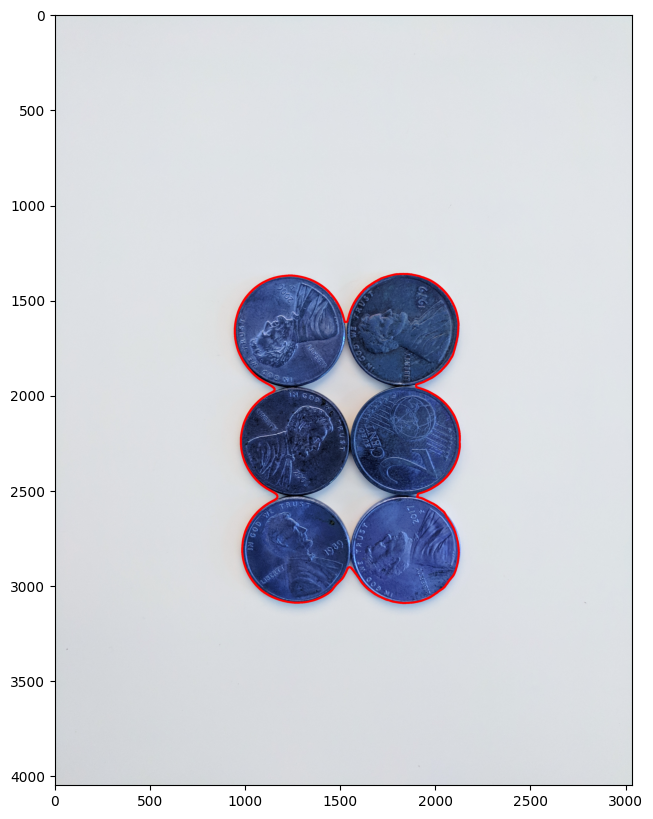

In [25]:
display(sep_coin)

---
## **Watershed Algorithm**

In [26]:
img = cv2.imread("../Image_processing/Resources/DATA/pennies.jpg")

In [27]:
img = cv2.medianBlur(img, 35)

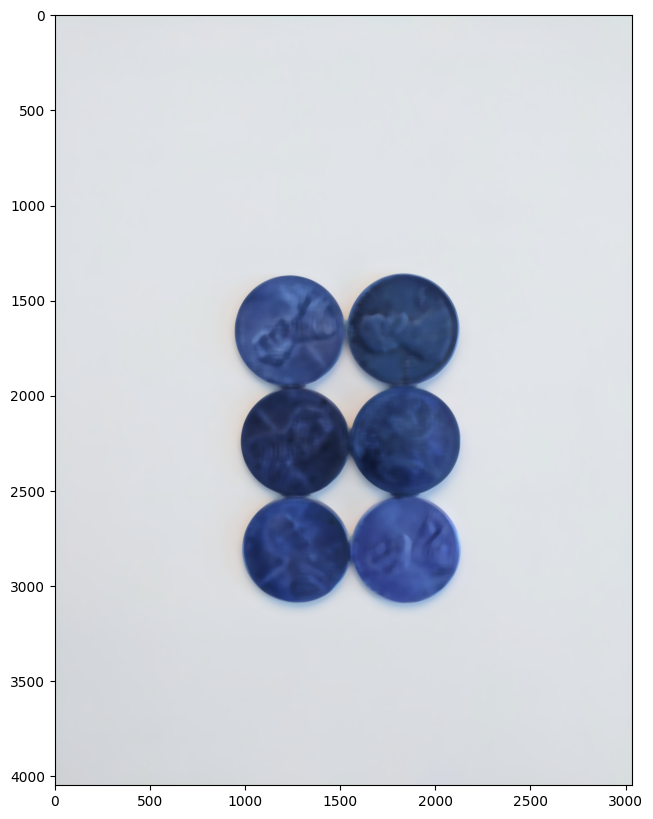

In [28]:
display(img)

In [29]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

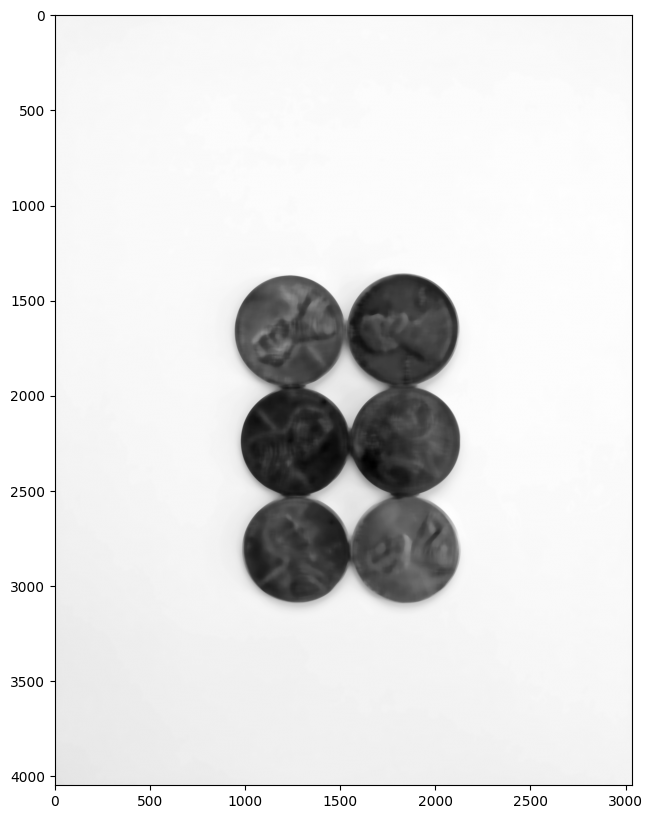

In [30]:
display(gray)

In [33]:
ret, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

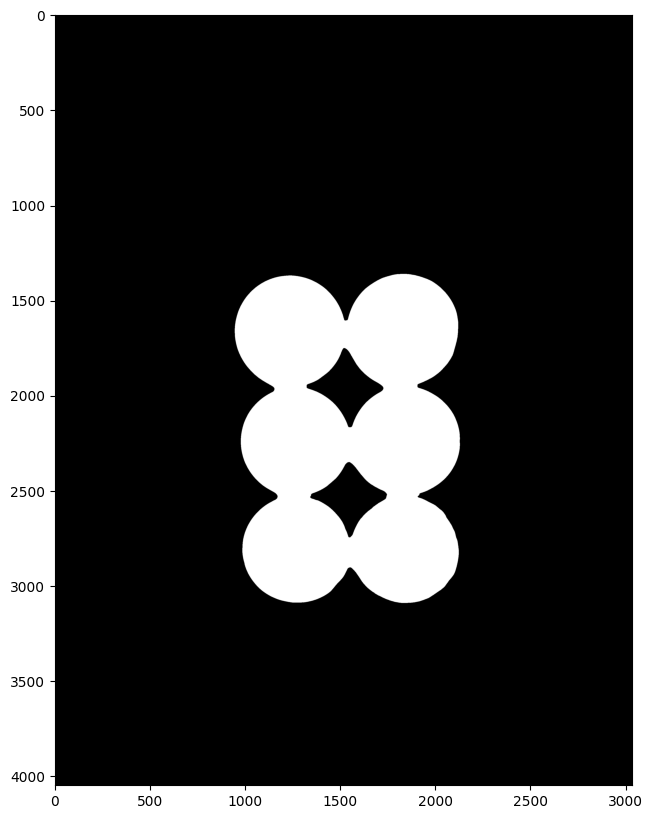

In [34]:
display(threshold)

In [35]:
# Noise removel (optional)

In [36]:
kernel = np.ones((3, 3), np.uint8)

In [37]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [39]:
opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations=2)

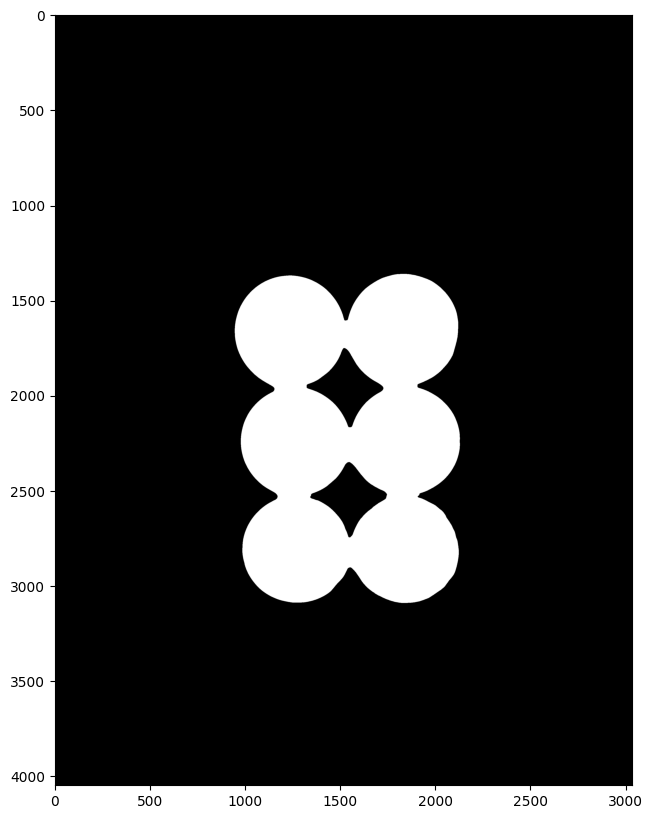

In [40]:
display(opening)

In [49]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

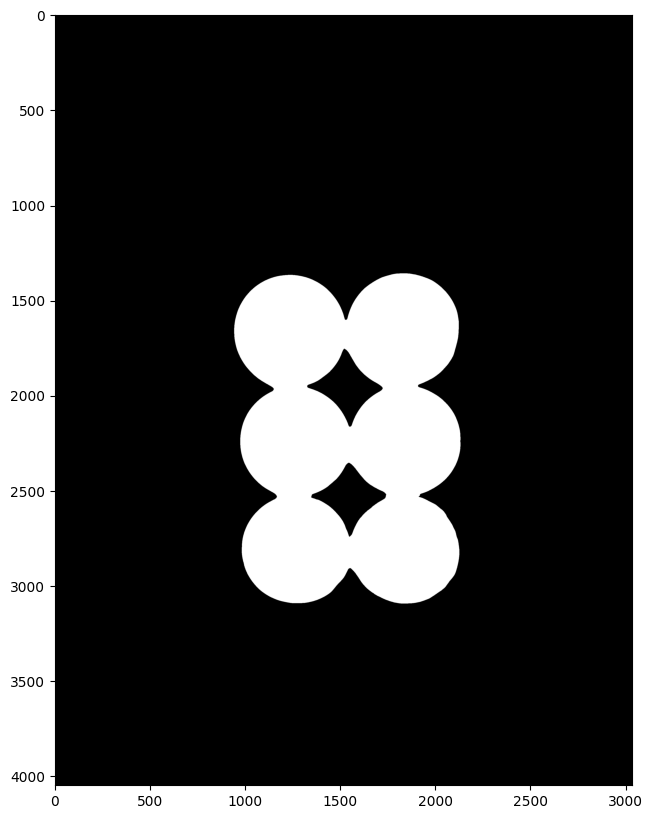

In [50]:
display(sure_bg)

In [41]:
# Distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

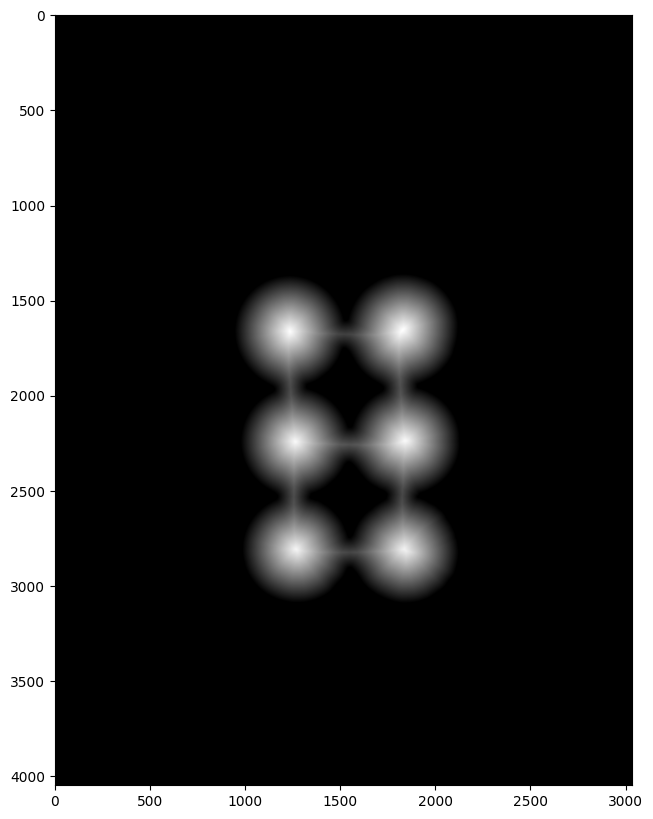

In [42]:
display(dist_transform)

In [43]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

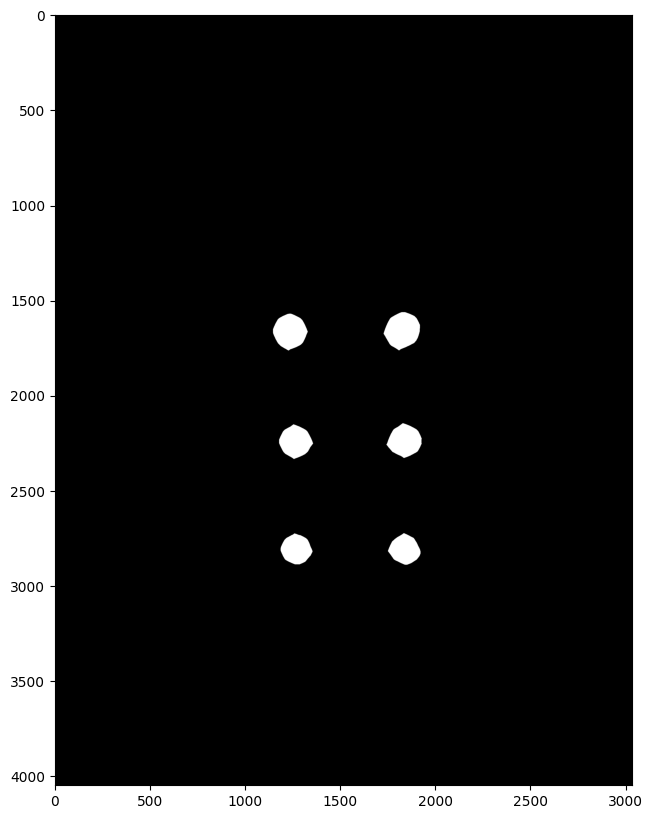

In [44]:
display(sure_fg)

In [45]:
sure_fg = np.uint8(sure_fg)

In [51]:
unknown = cv2.subtract(sure_bg, sure_fg)

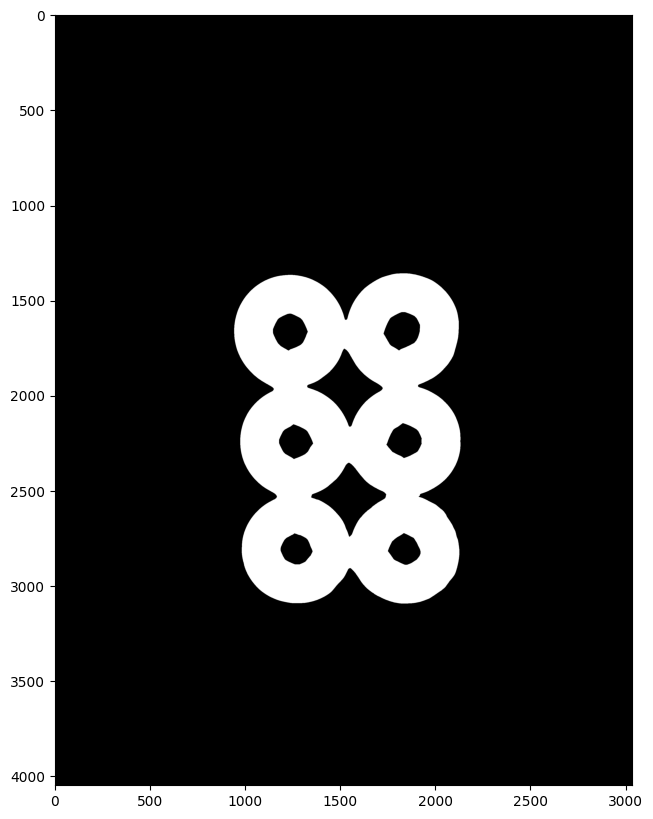

In [52]:
display(unknown)

In [53]:
ret, markers = cv2.connectedComponents(sure_fg)

In [55]:
markers = markers + 1

In [56]:
markers[unknown == 255] = 0

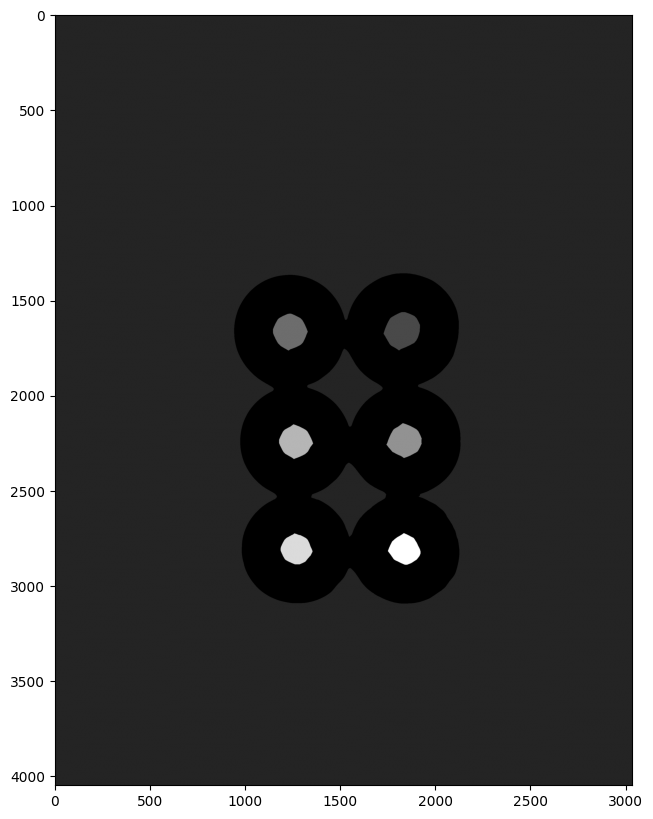

In [57]:
display(markers)

In [58]:
markers = cv2.watershed(img, markers)

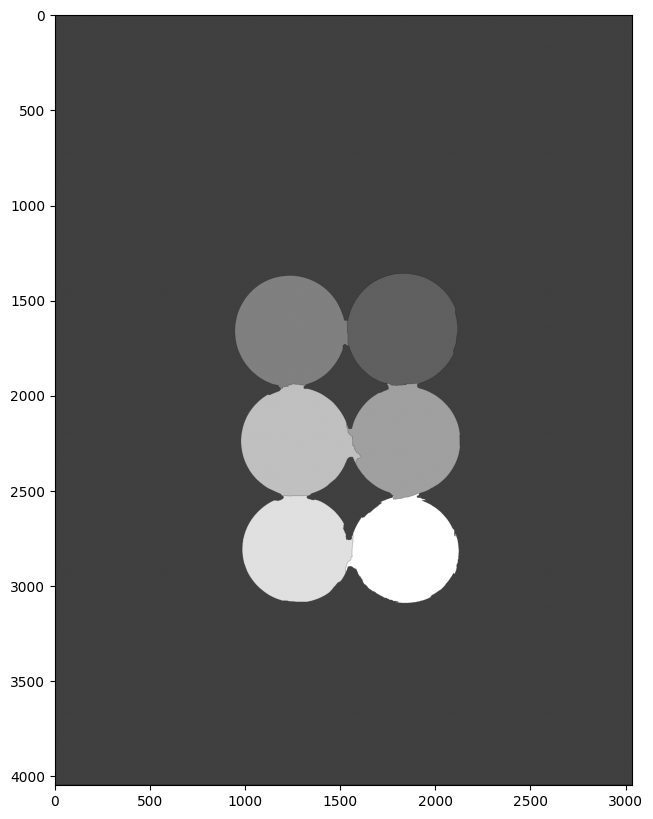

In [59]:
display(markers)

In [61]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [62]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coin, contours, i, (255, 0, 0), 10)

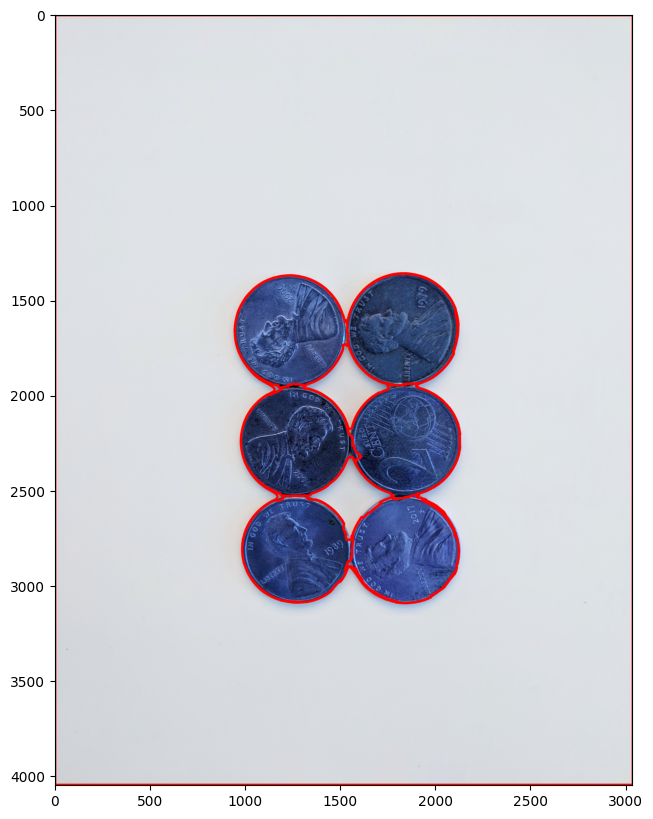

In [63]:
display(sep_coin)